In [1]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('captions.csv')
df.head()

,img_name,caption
0,MEN-Denim-id_00000080-01_7_additional.jpg,The lower clothing is of long length. The fabr...
1,MEN-Denim-id_00000089-01_7_additional.jpg,"His tank top has sleeves cut off, cotton fabri..."
2,MEN-Denim-id_00000089-02_7_additional.jpg,"His sweater has long sleeves, cotton fabric an..."
3,MEN-Denim-id_00000089-03_7_additional.jpg,"His shirt has short sleeves, cotton fabric and..."
4,MEN-Denim-id_00000089-04_7_additional.jpg,"The sweater the person wears has long sleeves,..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42544 entries, 0 to 42543
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_name  42544 non-null  object
 1   caption   42537 non-null  object
dtypes: object(2)
memory usage: 664.9+ KB


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df = 3, max_features = None,
                     strip_accents = 'unicode',analyzer = 'word',token_pattern = r'\w{1,}',
                     ngram_range = (1,3),
                     stop_words = 'english')

#filling NaNs with empty string
df['caption'] = df['caption'].fillna('')

In [9]:
tfv_matrix = tfv.fit_transform(df['caption'])

In [11]:
tfv_matrix

<42544x4095 sparse matrix of type '<class 'numpy.float64'>'
	with 2329378 stored elements in Compressed Sparse Row format>

In [13]:
tfv_matrix.shape

(42544, 4095)

In [15]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)

In [17]:
sig[0]

array([0.76169669, 0.76159962, 0.76159652, ..., 0.76159484, 0.76159646,
       0.76159472])

In [19]:
indices = pd.Series(df.index,index = df['img_name']).drop_duplicates()

In [21]:
indices

img_name
MEN-Denim-id_00000080-01_7_additional.jpg               0
MEN-Denim-id_00000089-01_7_additional.jpg               1
MEN-Denim-id_00000089-02_7_additional.jpg               2
MEN-Denim-id_00000089-03_7_additional.jpg               3
MEN-Denim-id_00000089-04_7_additional.jpg               4
                                                    ...  
WOMEN-Tees_Tanks-id_00007979-04_4_full.jpg          42539
WOMEN-Tees_Tanks-id_00007979-04_7_additional.jpg    42540
WOMEN-Tees_Tanks-id_00007981-03_1_front.jpg         42541
WOMEN-Tees_Tanks-id_00007981-03_3_back.jpg          42542
WOMEN-Tees_Tanks-id_00007981-03_7_additional.jpg    42543
Length: 42544, dtype: int64

In [108]:
indices['MEN-Denim-id_00000089-01_7_additional.jpg']

1

In [110]:
sig[1]

array([0.76159962, 0.76169669, 0.76160606, ..., 0.76159831, 0.76159955,
       0.76159773])

In [112]:
list(enumerate(sig[indices['MEN-Denim-id_00000089-01_7_additional.jpg']]))

[(0, 0.7615996236952642),
 (1, 0.7616966947201955),
 (2, 0.7616060570365935),
 (3, 0.7616172365841537),
 (4, 0.7616038657577315),
 (5, 0.7616120899735368),
 (6, 0.7616187741728908),
 (7, 0.761604803217793),
 (8, 0.7616074694537945),
 (9, 0.7616011911390018),
 (10, 0.7616088419972513),
 (11, 0.7616135313632783),
 (12, 0.761601569448094),
 (13, 0.761614462430395),
 (14, 0.7616177145544529),
 (15, 0.7616169774294024),
 (16, 0.7616240097694507),
 (17, 0.7616159695773007),
 (18, 0.7616142418789994),
 (19, 0.7616048900119394),
 (20, 0.7616003631010198),
 (21, 0.7616036307742182),
 (22, 0.7615999403779794),
 (23, 0.7616095746203165),
 (24, 0.7616093522162105),
 (25, 0.7615975251446725),
 (26, 0.7616160598009235),
 (27, 0.7615984926498519),
 (28, 0.7616001951573111),
 (29, 0.7616048818761549),
 (30, 0.7616113775869161),
 (31, 0.7616232610319247),
 (32, 0.761600370489732),
 (33, 0.761602101783101),
 (34, 0.7616095521204003),
 (35, 0.7616106467149589),
 (36, 0.7616033197560935),
 (37, 0.76161935

In [114]:
sorted(list(enumerate(sig[indices['MEN-Denim-id_00000089-01_7_additional.jpg']])),key = lambda x: x[1],reverse = True)

[(1, 0.7616966947201955),
 (4180, 0.7616672829206587),
 (584, 0.7616557111632825),
 (4560, 0.7616552198672069),
 (33480, 0.7616533338852074),
 (4116, 0.7616519823574406),
 (2854, 0.7616504990462206),
 (3364, 0.7616500389302945),
 (4869, 0.7616486215811561),
 (19289, 0.7616484014438415),
 (3733, 0.7616482731762886),
 (9268, 0.7616482731762886),
 (20522, 0.7616482731762886),
 (25345, 0.7616482731762886),
 (33415, 0.7616482731762886),
 (34033, 0.7616482731762886),
 (34196, 0.7616482731762886),
 (36492, 0.7616482731762886),
 (38369, 0.7616482731762886),
 (42086, 0.7616482731762886),
 (42417, 0.7616482731762886),
 (66, 0.7616479354840487),
 (24720, 0.7616476796705355),
 (4800, 0.7616474354064232),
 (2294, 0.7616473706426442),
 (551, 0.7616468776406935),
 (604, 0.7616465036749),
 (81, 0.7616462012631734),
 (647, 0.7616455999061351),
 (3710, 0.7616453111782785),
 (36018, 0.7616453111782785),
 (36047, 0.7616449315089916),
 (8488, 0.7616442539493276),
 (40793, 0.7616432363737399),
 (1619, 0.761

In [45]:
import os
images = []
for file in os.listdir('boys/Boys_resized'):
  images.append(os.path.join('boys/Boys_resized',file))

for file in os.listdir('Girls/girls_resized_images'):
  images.append(os.path.join('Girls/girls_resized_images',file))
    
print(len(images))
print(images[0:5])

44097
['boys/Boys_resized/MEN-Tees_Tanks-id_00002249-02_7_additional.jpg', 'boys/Boys_resized/MEN-Sweatshirts_Hoodies-id_00002818-01_2_side.jpg', 'boys/Boys_resized/MEN-Tees_Tanks-id_00000345-02_2_side.jpg', 'boys/Boys_resized/MEN-Tees_Tanks-id_00001774-07_7_additional.jpg', 'boys/Boys_resized/MEN-Tees_Tanks-id_00001519-01_7_additional.jpg']


In [47]:
import os
import cv2
import matplotlib.pyplot as plt

# Create a dictionary mapping image names to their file paths
image_paths = {os.path.basename(img): img for img in images}

# Function to display image using matplotlib
def display_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

def give_rec(name, sig=sig):
    # Get the index corresponding to the image
    idx = indices[name]

    # Get the pairwise similarity scores
    sig_scores = list(enumerate(sig[idx]))

    sig_scores = sorted(sig_scores,key = lambda x: x[1],reverse = True)

    # Sort the images and get top 5
    sig_scores = sig_scores[1:6]

    # Get the img_name from the DataFrame
    img_indices = [i[0] for i in sig_scores]

    #top 5 recommendations
    print(df['img_name'].iloc[img_indices])
    img_names = df['img_name'].iloc[[i[0] for i in sig_scores]].tolist()
    

    # Display images by finding the corresponding file path
    for img_name in img_names:
        if img_name in image_paths:
            display_image(image_paths[img_name])
        else:
            print(f"Image {img_name} not found")



566        MEN-Pants-id_00003594-04_7_additional.jpg
3770        MEN-Tees_Tanks-id_00003980-01_4_full.jpg
16673        WOMEN-Dresses-id_00003491-01_4_full.jpg
41214    WOMEN-Tees_Tanks-id_00007041-02_1_front.jpg
23695         WOMEN-Pants-id_00000499-01_1_front.jpg
Name: img_name, dtype: object


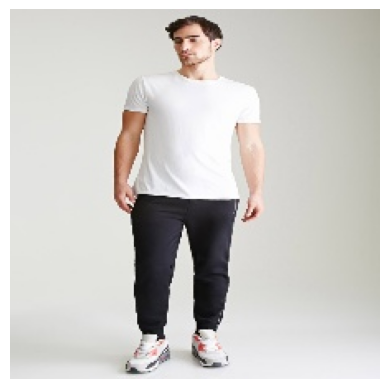

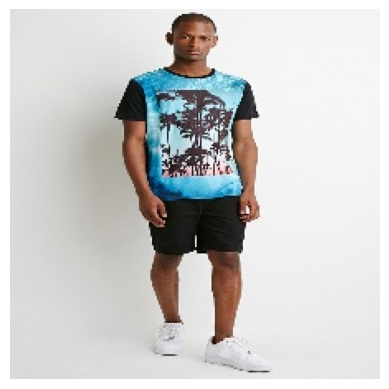

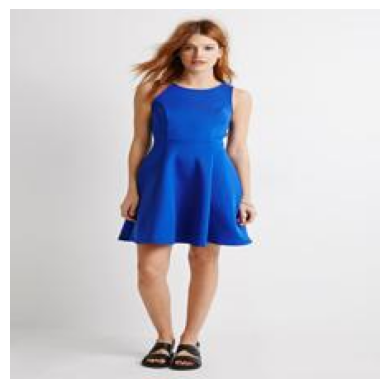

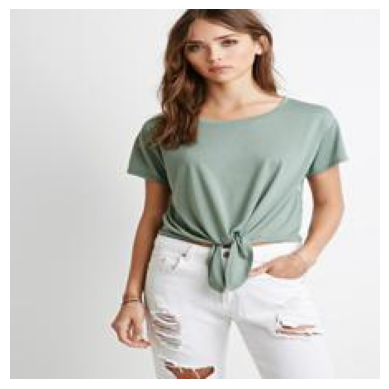

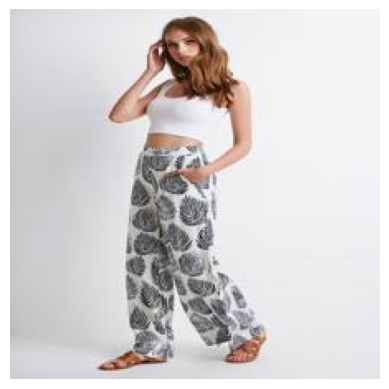

In [49]:
give_rec('MEN-Shorts-id_00005609-04_1_front.jpg')